# EDA of YC Startup Directory - 2024 Dataset
We start of by performing Exploratory Data Analysis on one of our datasets - YC Startup Directory Dataset 2024 from Kaggle. 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [23]:
df = pd.read_csv("2024-05-11-yc-companies.csv")

# prints the first 5 rows of the dataset
print(df.head(5))

   company_id   company_name  \
0       29523   K-Scale Labs   
1       29519  Forge Rewards   
2       29517    RetailReady   
3       29610     Hamming AI   
4       29518        FanCave   

                                   short_description  \
0                        Open-source humanoid robots   
1  All-in-one operations software to power restau...   
2       An AI-powered supply chain compliance engine   
3                                 Making AI reliable   
4         Powering the free agency of college sports   

                                    long_description batch  status  \
0  We're building humanoid robots to do most of w...   W24  Active   
1  Forge is the modern operations software for em...   W24  Active   
2  Every time workers in a warehouse box an order...   W24  Active   
3  If 2023 was the year of AI POCs, 2024 is the y...   S24  Active   
4  FanCave powers the free agency of college spor...   W24  Active   

                                                t

In [24]:
df.dtypes

company_id             int64
company_name          object
short_description     object
long_description      object
batch                 object
status                object
tags                  object
location              object
country               object
year_founded         float64
num_founders           int64
founders_names        object
team_size            float64
website               object
cb_url                object
linkedin_url          object
dtype: object

There are some columns that will never be touched, and dropping them is a classic choice in EDA. In our case, I don't see myself using the linkedin_url, cb_url, founders_names, company_name, website, and company_id so I will drop them.

In [25]:
df = df.drop(['company_id', 'company_name', 'founders_names', 'website', 'cb_url', 'linkedin_url'], axis=1)
df.head(5)


,short_description,long_description,batch,status,tags,location,country,year_founded,num_founders,team_size
0,Open-source humanoid robots,We're building humanoid robots to do most of w...,W24,Active,"['artificial-intelligence', 'machine-learning'...",New York,US,2024.0,3,3.0
1,All-in-one operations software to power restau...,Forge is the modern operations software for em...,W24,Active,"['fintech', 'food-tech', 'ai']",San Francisco,US,2023.0,2,2.0
2,An AI-powered supply chain compliance engine,Every time workers in a warehouse box an order...,W24,Active,"['b2b', 'compliance', 'logistics', 'supply-cha...",NaN,NaN,2024.0,2,3.0
3,Making AI reliable,"If 2023 was the year of AI POCs, 2024 is the y...",S24,Active,"['artificial-intelligence', 'developer-tools',...",San Francisco,US,2024.0,2,2.0
4,Powering the free agency of college sports,FanCave powers the free agency of college spor...,W24,Active,"['marketplace', 'sports-tech', 'consumer', 'en...","Roeland Park, KS",US,2024.0,2,2.0


In [26]:
df.shape

(4663, 10)

In [27]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:       short_description long_description batch    status tags location country  \
3503               NaN              NaN  IK12  Inactive   []      NaN     NaN   
3509               NaN              NaN  IK12  Inactive   []      NaN     NaN   
3510               NaN              NaN  IK12  Inactive   []      NaN     NaN   
3511               NaN              NaN  IK12  Inactive   []      NaN     NaN   
4539               NaN              NaN   S09  Inactive   []      NaN     NaN   
4577               NaN              NaN   S08  Inactive   []      NaN     NaN   
4651               NaN              NaN   S06  Inactive   []      NaN     NaN   

      year_founded  num_founders  team_size  
3503           NaN             0        0.0  
3509           NaN             0        0.0  
3510           NaN             0        0.0  
3511           NaN             0        0.0  
4539           NaN             2        0.0  
4577           NaN             2        0.0  
46

In [28]:
print(df.isnull().sum())

short_description     200
long_description      330
batch                   0
status                  0
tags                    0
location              270
country               263
year_founded         1080
num_founders            0
team_size              72
dtype: int64


<Axes: xlabel='year_founded'>

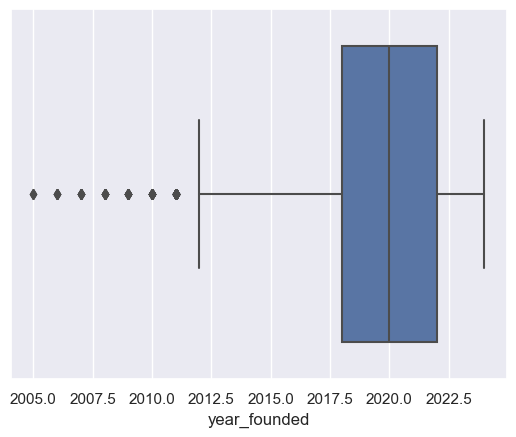

In [29]:
sns.boxplot(x=df['year_founded'])

From the boxplot above we see that we have some outliers before the year of 2012. It's tempting to remove them all, but before we do that we need to make sure that the numbers we're dropping are turly not useful for our research. First let's analyze startups before 2010 and statistics related to them. 

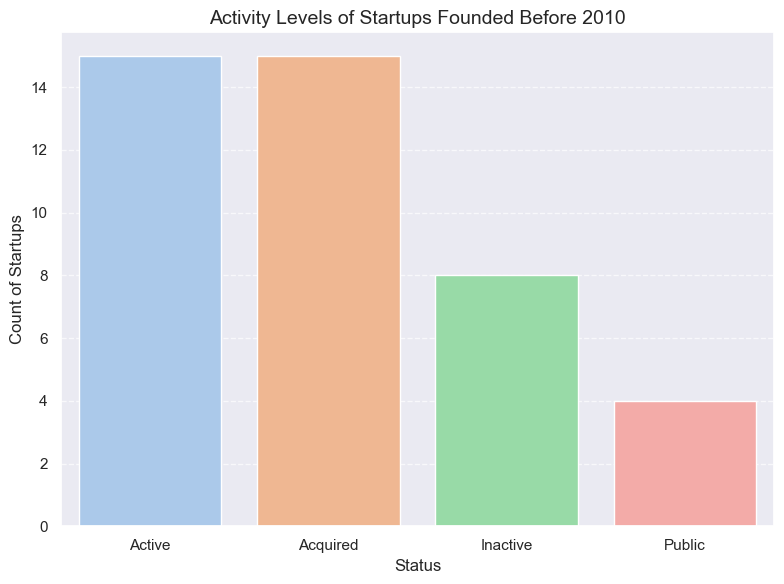

status
Active      15
Acquired    15
Inactive     8
Public       4
Name: count, dtype: int64


In [30]:
df_pre_2010 = df[df['year_founded'] < 2010]

status_count = df_pre_2010['status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_count.index, y=status_count.values, palette='pastel')
plt.title("Activity Levels of Startups Founded Before 2010", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count of Startups", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(status_count)

While this provides us with some insight to the activity status of companies before 2010, it does not tell us anything about the function of these active companies. The goal of this project is to analyze the trends before and after the AI boom. Let's do one last analysis, and this time let's see if the startups before 2010 include keywords related to AI/ML.

Number of AI-related companies founded before 2010: 1


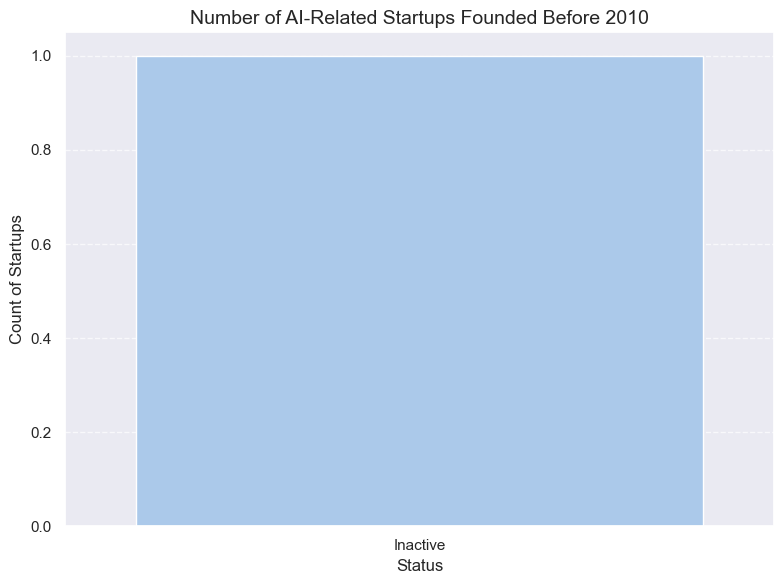

In [31]:
# Define AI-related tags and keywords
ai_tags = ['artificial-intelligence', 'machine-learning', 'generative-ai']

# Filter for companies before 2010 with the pre defined ai_tags array
df_pre_2010_ai = df[(df['year_founded'] < 2010) & (df['tags'].astype(str).str.contains('|'.join(ai_tags)))]
print(f"Number of AI-related companies founded before 2010: {len(df_pre_2010_ai)}")
status_counts_ai = df_pre_2010_ai['status'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts_ai.index, y=status_counts_ai.values, palette='pastel')
plt.title("Number of AI-Related Startups Founded Before 2010", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count of Startups", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now it is more clear that it is safe to disregard the values before the year of 2010. Since the goal of this work is to recognize patterns and draw connections of the AI era and the YC acceptance behvior, we do not want to create noise with data that is not quite relevant. 

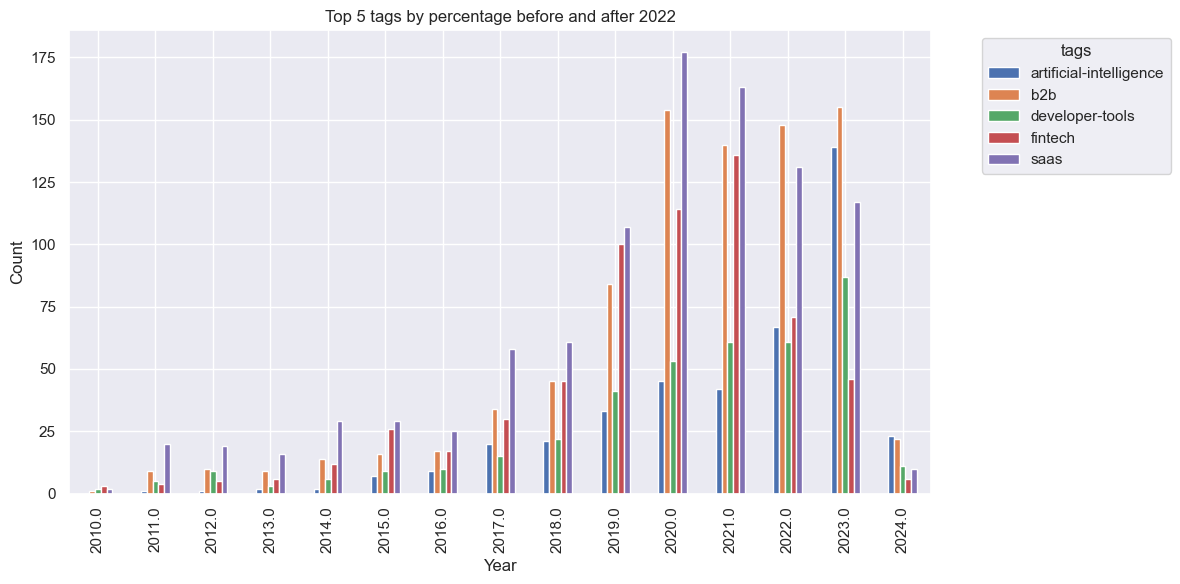

In [32]:
# Further Analysis using tags
year = 'year_founded'
tags = 'tags'
df[tags] = df[tags].astype(str)

df[tags] = df[tags].str.strip("[]").str.replace("'", "").str.split(", ")
tag_expand = df.explode(tags)

tag_count = tag_expand.groupby(['tags', 'year_founded']).size().reset_index(name='count')
most_freq_tags = tag_expand[tags].value_counts().head(5).index


filtered = tag_count[tag_count[tags].isin(most_freq_tags)]

post_2010 = filtered[filtered[year] >= 2010]

table_fix = post_2010.pivot_table(index=tags, columns=year, values='count', fill_value=0)

# visualize
table_fix.T.plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 tags by percentage before and after 2022")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="tags", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

Looking at the table above that represents the most frequent tags related to the companies between 2010 and 2024, we see that artificial intelligence made it to the top. Close observation also yields that the bars associated with this tags had a sudden spike in 2023. For example, blue bar that represents artificial-intelligence tag went from around 56 in 2022 to 130 in 2023 indicating 132 percent increase. 

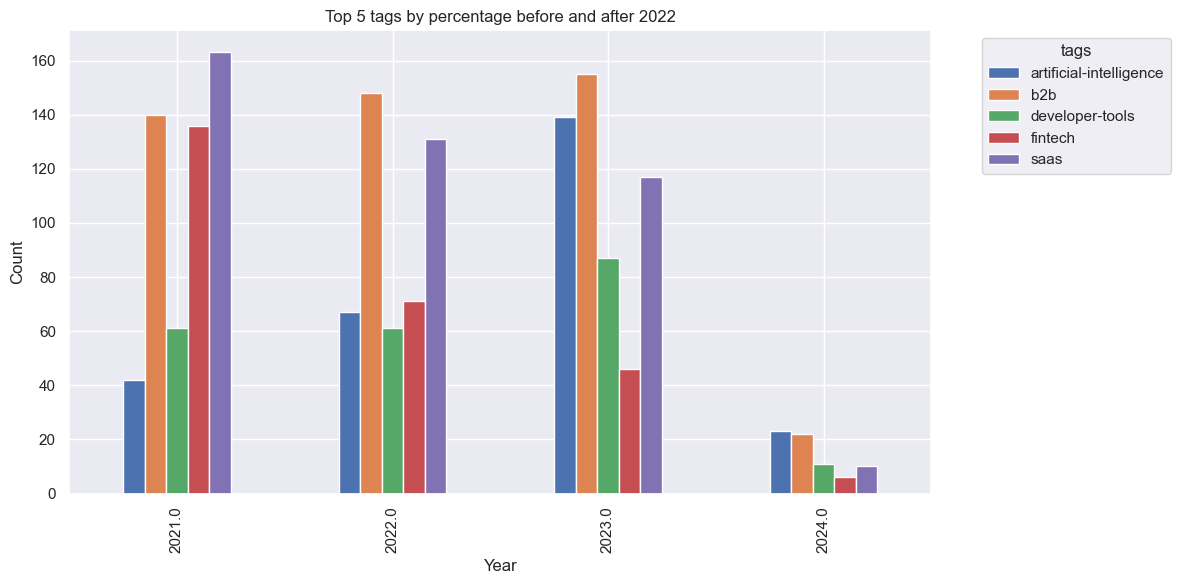

In [33]:
# Further Analysis using tags
year = 'year_founded'
tags = 'tags'
df[tags] = df[tags].astype(str)

df[tags] = df[tags].str.strip("[]").str.replace("'", "").str.split(", ")
tag_expand = df.explode(tags)

tag_count = tag_expand.groupby(['tags', 'year_founded']).size().reset_index(name='count')
most_freq_tags = tag_expand[tags].value_counts().head(5).index


filtered = tag_count[tag_count[tags].isin(most_freq_tags)]

post_2021 = filtered[filtered[year] >= 2021]


table_fix = post_2021.pivot_table(index=tags, columns=year, values='count', fill_value=0)


# visualize
table_fix.T.plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 tags by percentage before and after 2022")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="tags", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
ai_startups = tag_expand[tag_expand[tags].str.lower()=='artificial-intelligence']
batches_corr = ai_startups[['batch', tags]].sort_values('batch')
print(f"Number of Ai startups: {len(batches_corr)}")
print("\nBatch distribution of AI startups")
print(batches_corr)

Number of Ai startups: 466

Batch distribution of AI startups
     batch                     tags
4562   S08  artificial-intelligence
4525   S09  artificial-intelligence
4364   S11  artificial-intelligence
4283   S12  artificial-intelligence
4127   S13  artificial-intelligence
...    ...                      ...
190    W24  artificial-intelligence
193    W24  artificial-intelligence
198    W24  artificial-intelligence
140    W24  artificial-intelligence
0      W24  artificial-intelligence

[466 rows x 2 columns]


In [35]:
def get_year(batch):
    return int(batch[1:])
ai_startups['year'] = ai_startups['batch'].apply(get_year)

before_22 = ai_startups[ai_startups['year'] < 22]
after_22 = ai_startups[ai_startups['year'] >= 22]

print("Before 2022:")
print("\nTotal before 2022:", len(before_22))


print("\nAfter 2022:")
print("\nTotal after 2022:", len(after_22))

Before 2022:

Total before 2022: 200

After 2022:

Total after 2022: 266


/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/1501344233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_startups['year'] = ai_startups['batch'].apply(get_year)


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

df = pd.read_csv("2024-05-11-yc-companies.csv")

# Filter startups founded in 2010 or later
df_filtered = df[df['year_founded'] >= 2010]

df_filtered['era'] = df_filtered['year_founded'].apply(lambda x: 'Post-2022' if x >= 2022 else 'Pre-2022')

#relevant features
features = ['tags', 'team_size', 'num_founders']  # Add more features if available
df_model = df_filtered[features + ['era']].dropna()

# Process tags
df_model['tags'] = df_model['tags'].astype(str).str.strip("[]").str.replace("'", "").str.replace(",", " ")
vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features for simplicity
tags_vectorized = vectorizer.fit_transform(df_model['tags']).toarray()
numerical_features = df_model[['team_size', 'num_founders']].fillna(0).values
X = np.hstack((tags_vectorized, numerical_features))
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_model['era'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_names = vectorizer.get_feature_names_out().tolist() + ['team_size', 'num_founders']
importance = model.feature_importances_
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
important_features = important_features.sort_values(by='Importance', ascending=False).head(10)
print("\nTop 10 Most Important Features:\n", important_features)

joblib.dump(model, 'yc_startup_classifier.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/2850680867.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['era'] = df_filtered['year_founded'].apply(lambda x: 'Post-2022' if x >= 2022 else 'Pre-2022')


Accuracy: 0.8556405353728489

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       297
           1       0.88      0.93      0.90       749

    accuracy                           0.86      1046
   macro avg       0.83      0.80      0.81      1046
weighted avg       0.85      0.86      0.85      1046


Confusion Matrix:
 [[200  97]
 [ 54 695]]

Top 10 Most Important Features:
           Feature  Importance
378     team_size    0.208908
9              ai    0.059812
35            b2b    0.037412
299          saas    0.035933
379  num_founders    0.034749
193  intelligence    0.034054
166    generative    0.030478
25     artificial    0.028276
152       fintech    0.023733
114     developer    0.016761


['vectorizer.pkl']

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return tokens

# Load the dataset
df = pd.read_csv("2024-05-11-yc-companies.csv")

# Filter startups founded after 2010
df_filtered = df[df['year_founded'] >= 2010]

# Create a binary target column: 1 for Post-2022, 0 for Pre-2022
df_filtered['target'] = df_filtered['year_founded'].apply(lambda x: 1 if x >= 2022 else 0)

# Combine and preprocess text descriptions
df_filtered['combined_description'] = (
    df_filtered['short_description'].fillna('') + ' ' + df_filtered['long_description'].fillna('')
)
df_filtered['processed_description'] = df_filtered['combined_description'].apply(preprocess_text)

# Train Word2Vec on the processed text data
all_sentences = df_filtered['processed_description'].tolist()
word2vec_model = Word2Vec(sentences=all_sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to calculate the average Word2Vec vector for a text
def get_avg_word2vec_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Generate Word2Vec embeddings for each description
description_vectors = np.array([
    get_avg_word2vec_vector(tokens, word2vec_model, 100) for tokens in df_filtered['processed_description']
])

# Process tags using Word2Vec (if tags are present)
df_filtered['processed_tags'] = df_filtered['tags'].astype(str).apply(preprocess_text)
tags_vectors = np.array([
    get_avg_word2vec_vector(tokens, word2vec_model, 100) for tokens in df_filtered['processed_tags']
])

# Combine features
numerical_features = df_filtered[['team_size', 'num_founders']].fillna(0).values
X = np.hstack((numerical_features, description_vectors, tags_vectors))
y = df_filtered['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model and Word2Vec
joblib.dump(model, 'startup_trend_classifier_word2vec.pkl')
word2vec_model.save('word2vec_model_startup.w2v')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feruza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/feruza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/1999326640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['year_founded'].apply(lambda x: 1 if x >= 2022 else 0)
/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/1999326640.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Accuracy: 0.779868297271872

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       761
           1       0.78      0.31      0.45       302

    accuracy                           0.78      1063
   macro avg       0.78      0.64      0.65      1063
weighted avg       0.78      0.78      0.74      1063



We see low performance with  RandomForestClassifier. We now try with logistic regression while also integrating vector embeddings

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import joblib

# Fix imbalance for the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model
joblib.dump(log_reg, 'logistic_regression_startup_model.pkl')


Accuracy: 0.788741302972802

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75       752
           1       0.75      0.90      0.82       829

    accuracy                           0.79      1581
   macro avg       0.80      0.78      0.78      1581
weighted avg       0.80      0.79      0.78      1581


Confusion Matrix:
 [[498 254]
 [ 80 749]]


['logistic_regression_startup_model.pkl']

In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Load the dataset
df = pd.read_csv("2024-05-11-yc-companies.csv")

# Drop irrelevant columns
columns_to_drop = ['company_id', 'company_name', 'founders_names', 'website', 'cb_url', 'linkedin_url']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Filter startups founded after 2010
df_filtered = df[df['year_founded'] >= 2010]

# Create a binary target column: 1 for Post-2022, 0 for Pre-2022
df_filtered['target'] = df_filtered['year_founded'].apply(lambda x: 1 if x >= 2022 else 0)

# Combine and preprocess text descriptions
df_filtered['combined_description'] = (
    df_filtered['short_description'].fillna('') + ' ' + df_filtered['long_description'].fillna('')
)
df_filtered['processed_description'] = df_filtered['combined_description'].apply(preprocess_text)

# Preprocess tags
df_filtered['processed_tags'] = df_filtered['tags'].astype(str).apply(preprocess_text)

# Vectorize text features using TF-IDF
tfidf_description = TfidfVectorizer(max_features=500)
description_tfidf = tfidf_description.fit_transform(df_filtered['processed_description']).toarray()

tfidf_tags = TfidfVectorizer(max_features=500)
tags_tfidf = tfidf_tags.fit_transform(df_filtered['processed_tags']).toarray()

# Combine features
numerical_features = df_filtered[['team_size', 'num_founders']].fillna(0).values
X = np.hstack((numerical_features, description_tfidf, tags_tfidf))
y = df_filtered['target']

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model and vectorizers
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(tfidf_description, 'description_vectorizer.pkl')
joblib.dump(tfidf_tags, 'tags_vectorizer.pkl')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feruza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/feruza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/3386866771.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['year_founded'].apply(lambda x: 1 if x >= 2022 else 0)
/var/folders/_x/vpjb_csj1znfqgjstz6dpzxm0000gn/T/ipykernel_4779/3386866771.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Accuracy: 0.8526249209361164

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       752
           1       0.82      0.92      0.87       829

    accuracy                           0.85      1581
   macro avg       0.86      0.85      0.85      1581
weighted avg       0.86      0.85      0.85      1581


Confusion Matrix:
 [[585 167]
 [ 66 763]]


['tags_vectorizer.pkl']

In [40]:
# Combine feature names
numerical_feature_names = ['team_size', 'num_founders']
description_feature_names = tfidf_description.get_feature_names_out()
tags_feature_names = tfidf_tags.get_feature_names_out()
all_feature_names = numerical_feature_names + list(description_feature_names) + list(tags_feature_names)

# Extract coefficients
coefficients = log_reg.coef_[0]

# Map coefficients to feature names
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Print top 10 most important features
print("Top 5 Features Indicating Post-2022 Trends:")
print(feature_importance.head(5))


Top 5 Features Indicating Post-2022 Trends:
        Feature  Coefficient
18           ai     3.855881
271        llms     2.854978
91   compliance     2.273248
172     example     2.092859
195    generate     1.911158


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter startups before 2022
pre_2022_data = df_filtered[df_filtered['year_founded'] < 2022]

# Combine text data
combined_text_pre_2022 = pre_2022_data['combined_description'].fillna('') + ' ' + pre_2022_data['processed_tags'].fillna('')

# Vectorize text data
vectorizer = CountVectorizer(max_features=20, stop_words='english')
word_counts = vectorizer.fit_transform(combined_text_pre_2022)

# Get top words
top_words = vectorizer.get_feature_names_out()
word_counts_sum = word_counts.sum(axis=0).A1
top_words_df = pd.DataFrame({'Feature': top_words, 'Frequency': word_counts_sum}).sort_values(by='Frequency')
print("Top 5 Features Indicating Pre-2022 Trends:")
print(top_words_df.head(5))


Top 5 Features Indicating Pre-2022 Trends:
       Feature  Frequency
13      online        373
17       teams        383
5   businesses        387
4     business        392
8    customers        397


In [42]:
import numpy as np
import joblib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return tokens

# Get average Word2Vec vector
def get_avg_word2vec_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

model = joblib.load('startup_trend_classifier_word2vec.pkl')
word2vec_model = Word2Vec.load('word2vec_model_startup.w2v')

def predict_startup(startup):
    processed_description = preprocess_text(startup['description'])
    description_vector = get_avg_word2vec_vector(processed_description, word2vec_model, 100).reshape(1, -1)

    # Process tags and generate Word2Vec embedding
    processed_tags = preprocess_text(startup['tags'])
    tags_vector = get_avg_word2vec_vector(processed_tags, word2vec_model, 100).reshape(1, -1)

    # Combine features
    numerical_features = np.array([startup['team_size'], startup['num_founders']]).reshape(1, -1)
    input_features = np.hstack((numerical_features, description_vector, tags_vector))

    # Predict
    prediction = model.predict(input_features)
    probability = model.predict_proba(input_features)[0][1]  # Probability of being Post-2022
    return prediction[0], probability

# Example input
new_startup = {
    'team_size': 3,
    'num_founders': 2,
    'description': "An innovative AI platform for large language models development",
    'tags': "['artificial-intelligence', 'machine-learning', 'llms']"
}

prediction, probability = predict_startup(new_startup)
print("Prediction:", "Likely aligns with Post-2022 trends" if prediction == 1 else "Unlikely to align")
print(f"Probability of alignment: {probability:.2f}")


Prediction: Unlikely to align
Probability of alignment: 0.38


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feruza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/feruza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
import numpy as np

def annotate_heatmap(data, text_colors=('black', 'white'), threshold=None):
    if not threshold:
        threshold = data.max() / 2  # Set threshold to half the maximum value in the heatmap
    textcolors = np.array(text_colors)

    # Annotate the heatmap
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(
                j + 0.5, i + 0.5,  # Position
                format(data[i, j], 'd'),  
                ha='center', va='center',
                color=textcolors[int(data[i, j] > threshold)]  # Choose color based on threshold
            )

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=["Pre-2022", "Post-2022"],
            yticklabels=["Pre-2022", "Post-2022"],
            cbar=True)

annotate_heatmap(cm, text_colors=('black', 'white'))

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()


NameError: name 'cm' is not defined

<Figure size 800x600 with 0 Axes>

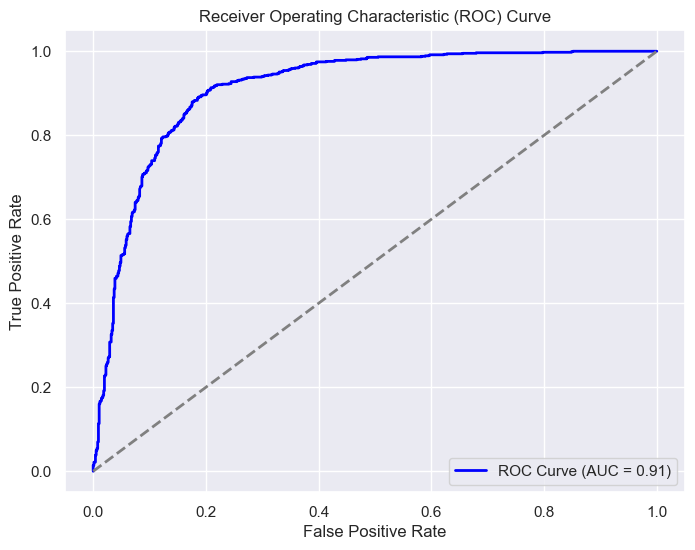

In [44]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for ROC
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
